### Roman Dzadzic   10/22/2021

## E-news Express Project

### Project Description

#### Background/context: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?

*Consider a significance level of 0.05 for all tests.

#### Data Dictionary:

* **user_id** - This represents the user ID of the person visiting the website.
* **group** - This represents whether the user belongs to the first group (control) or the second group (treatment).
* **landing_page** - This represents whether the landing page is new or old.
* **time_spent_on_the_page** - This represents the time (in minutes) spent by the user on the landing page.
* **converted** - This represents whether the user gets converted to a subscriber of the news portal or not.
* **language_preferred** - This represents the language chosen by the user to view the landing page.

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import math
import scipy.stats as stats # this library contains a large number of probability distributions as well as 
# ...a growing library of statistical functions.
from scipy.stats import ttest_1samp
from numpy import sqrt, abs
from scipy.stats import norm 

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
df = pd.read_csv('abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

* The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the user_id, which test group that user belongs to and the associated landing page along with conversion data and the language.
* The 'time_spent_on_the_page' column has numeric values.
* The 'user_id' column has the actual generated user id numeric value.
* The 'landing_page' column either refers to the 'new' or 'old' page.
* The 'converted' column contains 'yes' or 'no' labels to reflect whether the desired CTA (call to action) was achieved.
* Lastly, the 'language_preferred' column likely shows users' language preferences.

In [4]:
df.shape # using data shape understand the dataset

(100, 6)

#### Observations: The dataset has 100 rows and 6 columns.

In [5]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations:

* There are no null values in this dataset.

In [6]:
# verifying that there are in fact 100 unique users and that users are not repeating in the two different groups (or page types)
df.user_id.nunique()

100

In [7]:
# using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* All column have 100 data points/observations which means that neither of the columns likely have missing data.
* 'group', 'landing_page', 'converted', and 'language_preferred' are represented as objects, but should be categorical variables and we should convert them as such.
* 'user_id' is represented as int64.
* And lastly, the 'time_spent_on_the_page' is presented as the float64 (decimal number).

In [8]:
# converting "objects" to "category" reduces the data space required to store the dataframe
# below is the code used to convert the 4 objects vairables into the categorical data

df['group'] = df.group.astype('category') # as type used with all 3 categories
df['landing_page'] = df.landing_page.astype('category')
df['converted'] = df.converted.astype('category')
df['language_preferred'] = df.language_preferred.astype('category')

# use info() to print a concise summary of the dataset to verify the action
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:
* There are now 2 numeric columns (one int64 and one float64), 4 categorical columns.
* All data types are changed as expected.

In [9]:
df.describe() # using describe() to observe the summary statistic

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations:

* Summary statistics confirms the count of 100 records across the two numeric variables.
* Although the CSV data file has 100 'user_id' records, looks like the difference between the min and the max values of 'user_id' is 149 records.
* Mean time spent on page is 5.38 min, which is pretty close to the 50%, which is 5.42 min.
* Various users have spent anywhere from min of 0.19 to the max of 10.71 minutes.
* Based on the min, max, 50%, and the mean, this almost looks like a normal distribution curve, but to be confirmed later in the paper during exploratory data analysis.

### Objective 1: Exploratory Data Analysis (EDA)

### Univariate Analysis

In [10]:
# Univariate charts go here...

# For univariate analysis of numerical variables, looking at their central tendency and dispersion.
# The below function helps create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots + histograms for the variable.
# The function allows me to plot a boxplot and a histogram along the same scale for better visibility.
# Also, within the 3 quotes below is the text that would be used if somebody searched for help on this function.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Text(0.5, 1.0, 'Distribution of Time Spent on The Page')

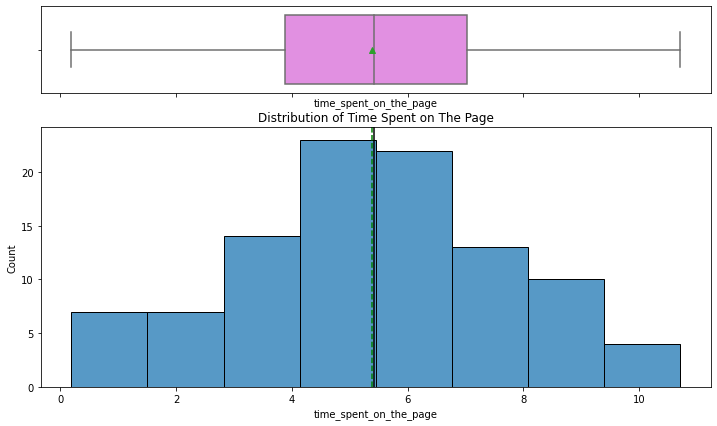

In [11]:
histogram_boxplot(df, 'time_spent_on_the_page')
plt.title('Distribution of Time Spent on The Page')

Text(0.5, 1.0, 'Density of Time Spent on The Page')

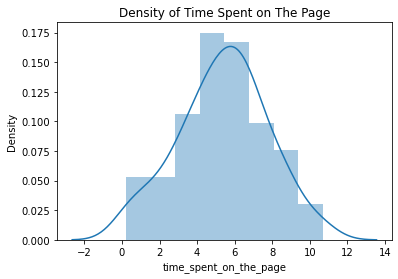

In [12]:
sns.distplot(df['time_spent_on_the_page']);
plt.title('Density of Time Spent on The Page')

#### Observations (3 charts above):

* The 'time_spent_on_the_page' seems like a normal bell-shaped distribution.
* It's highest peak is at around 23 counts of users spending close to 5 minutes on the page.
* Median time (solid black line) is very close to the mean time (green dashed line) with a very small and almost invisible left skew.
* The distribution of the time spent on page is pretty uniformly distributed with almost equal but slightly higher number of counts for the right side of the curve (right of the median), so there are likely a little more users spending more than 5 min on the page than there are users spending less than 5 min on the page. This, however, is likely not a significant difference.
* There is a 2nd peak in the curve at around 22 counts of users spending close to 6 minutes on the page.

### Categorical Data Analysis

In [13]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<Figure size 720x504 with 0 Axes>

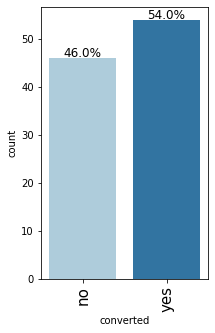

In [14]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'converted', perc=True)

#### Observations:

* 46% of users did NOT convert and 54% of users DID convert (for both page designs).
* There is a difference of about 8% in the number of users who converted / in favor of 'yes' results.

<Figure size 720x504 with 0 Axes>

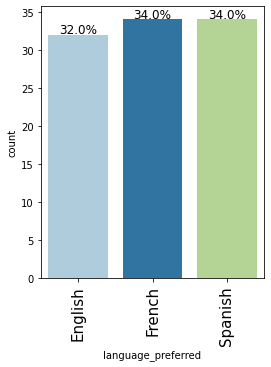

In [15]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'language_preferred', perc=True)

#### Observations:

* The visiting users have 3 language preferences: English, French, and Spanish.
* There are 32 counts of English preference visitors.
* There are 34 counts of both/each: French and Spanish visitors.

<Figure size 720x504 with 0 Axes>

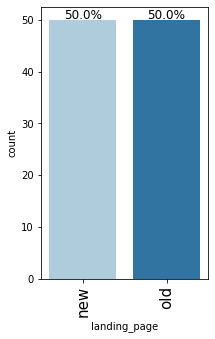

In [16]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'landing_page', perc=True)

#### Observations:

* There is an intuitively logical count of 50/50 in the 'new' and 'old' landing page visitors, because typically with A/B tests, there is a near even split of user/visitor traffic to both of the tested pages, A and B.
* We can see the similarly intuitive 50/50 split in the below chart for the 'group' category.

<Figure size 720x504 with 0 Axes>

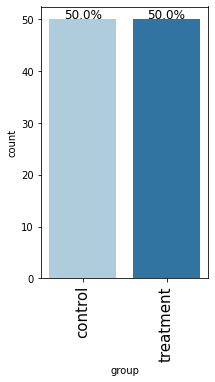

In [17]:
plt.figure(figsize=(10,7))
labeled_barplot(df, 'group', perc=True)

#### Observations:

* There is an intuitively logical count of 50/50 split in the 'control' and 'treatment' groups visitors, because typically with A/B tests, there is a near even split of user/visitor traffic to both types of groups, conrol and treatment.
* We can see the similarly intuitive 50/50 split in the above chart for the 'landing_page' category.

### Multivariate Analysis

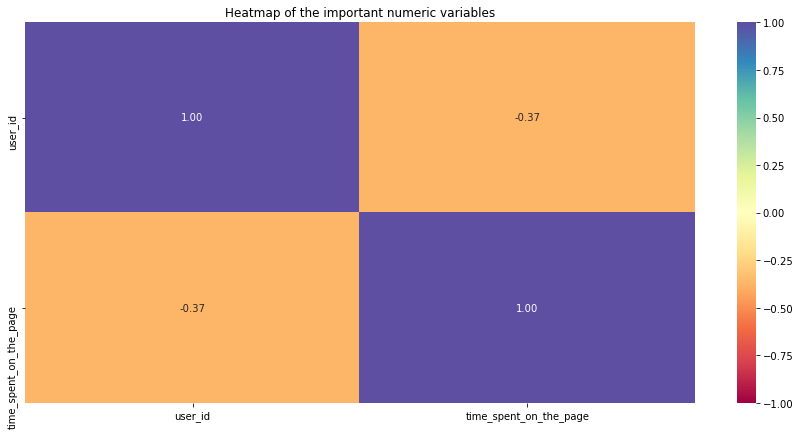

In [18]:
# Bivariate and multivariate charts go here...

# Correlation among numerical variables
num_var = ['user_id','time_spent_on_the_page']
corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Heatmap of the important numeric variables')
plt.show()

### Observations:
* In the above chart, I don't see a significant correlation between the two observed variables.

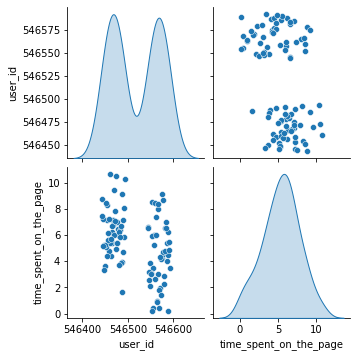

In [19]:
# using sns pairplot to see if there are any correlations amongst the observable variables.
sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

#### Observations:
* In the above charts, I don't see a significant correlation between any of the observed variables.
* User IDs seem to be distributed across two distinct groups of counts with respect to the ID count itself.
* User IDs have twin peaks likely because their visits are distributed across two groups, control and treatment. 
* As expected, the time spent on page is normally distributed.

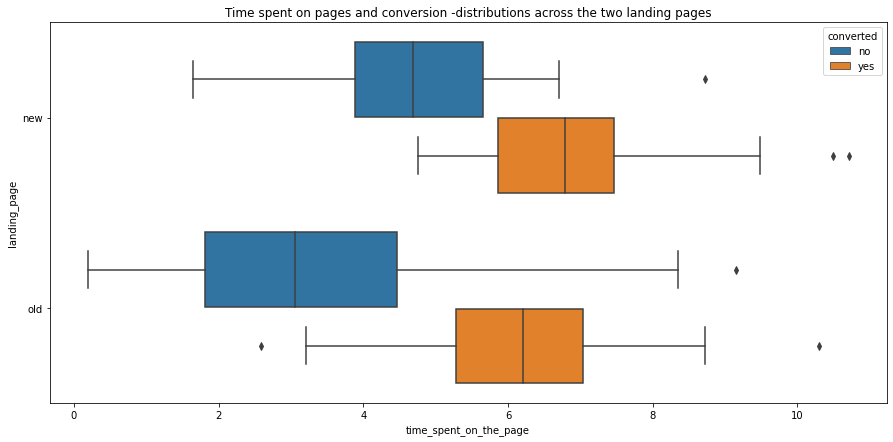

In [20]:
# drilling further down into the times spent on two landing pages with conversion as hue.
plt.figure(figsize=(15,7))           
sns.boxplot(df['time_spent_on_the_page'],df['landing_page'], hue=df['converted'])
plt.title('Time spent on pages and conversion -distributions across the two landing pages')
plt.show()

#### Observations:

* Converted visits to both landing pages have higher IQRs in terms of the time spent on pages than those visits that haven't converted.
* Both landing pages and their yes/no conversions have a small number of outliers, particularly on the higher end in terms of the times spent on pages.
* New landing page starts converting at 4.5 min spent on page (or 5.5 min for the 25 percentile of IQR), while the old landing page starts converting as low as 3 min spent on page (or just over 5 min for the 25th percentile of IQR). 
* One could say that the old landing page requires slightly less time spent on page in order to convert.
* One could also say that the old landing page requires considerably less time spent on page in order for the visits to drop (not convert). In other words, the IQR for non-conversions on the old landing page is a lot smaller than the IQR for the non-converted visitors of the new landing page.  

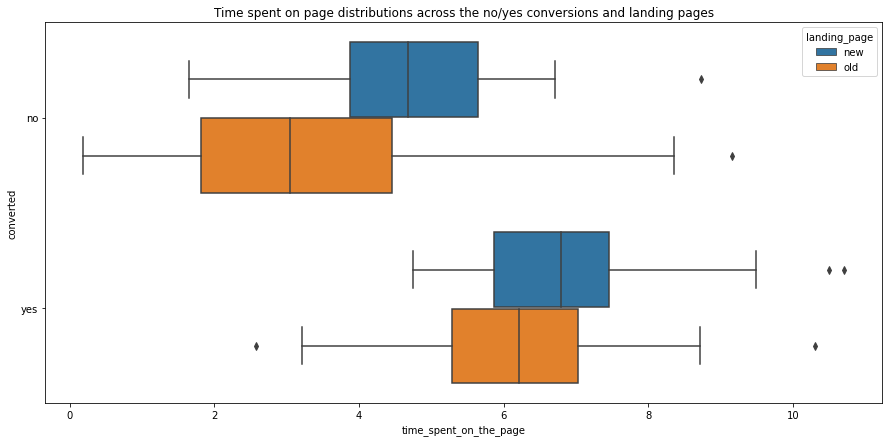

In [21]:
# looking at the above scenario, but with a slight twist: now converted is on 'y' axis, and new/old page is the hue
plt.figure(figsize=(15,7))           
sns.boxplot(df['time_spent_on_the_page'],df['converted'],hue=df['landing_page'])
plt.title('Time spent on page distributions across the no/yes conversions and landing pages')
plt.show()

#### Observations:

* Now we see that both new and old landing pages have similar IQRs for the converted times spent on page. However, New page seems to have slightly elevated IQRs from 6-7.5 minutes, while the old landing page has IQR from 5.5-7 minutes. The old page, therefore, seems to take visitors less time to read in order to decided that they will convert.
* The non-converted times spent on pages shows that visitors take less reading time on the old page to decide that they will NOT convert (IQR from 2-4.5 minutes). While visitors to the new landing page spend longer time on page before they decide to NOT convert (IQR from 4-5.5 min). 

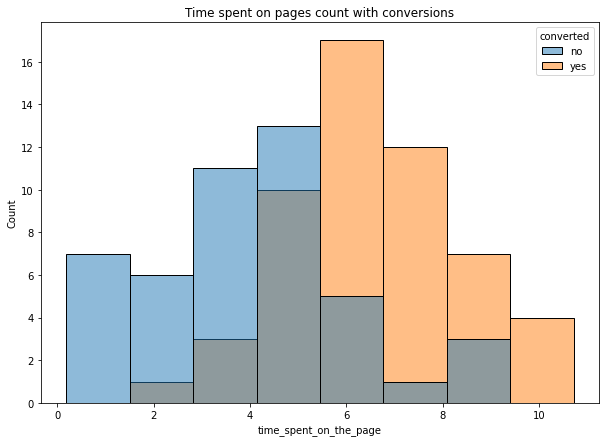

In [22]:
# using histplot to observe time spent on pages counts with hue on conversion.
plt.figure(figsize=(10,7))
sns.histplot(x='time_spent_on_the_page',data=df,hue=df['converted'])
plt.title('Time spent on pages count with conversions')
plt.show()

#### Observations:

* This chart shows that the count of most conversions, in terms of the time spent on pages, happens at the 6th minute and above.
* Simultaneously, the chart shows that most non-conversions happen from 0 - 4 minutes of time spent on pages in terms of the count of occurences.
* The most overlaps of the two values (converted and non-converted) happens at the 5th minute of the time spent on pages count.

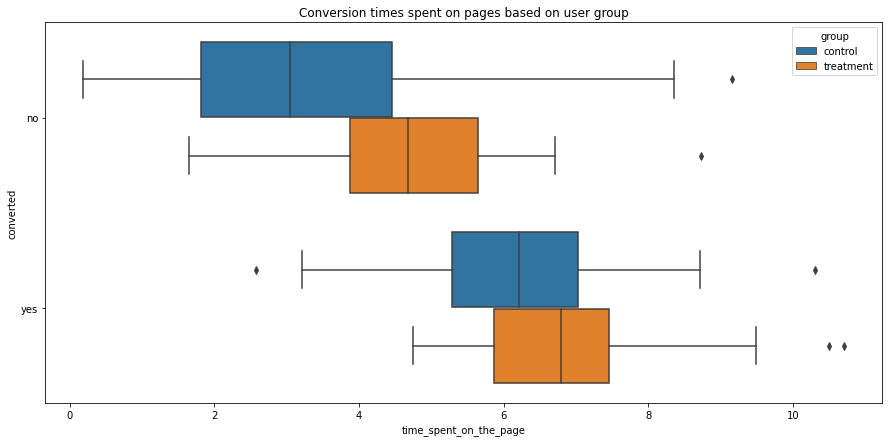

In [23]:
# looking at conversion times spent on pages based on which group users belong to, control or treatment.
plt.figure(figsize=(15,7))           
sns.boxplot(df['time_spent_on_the_page'],df['converted'],hue=df['group'])
plt.title('Conversion times spent on pages based on user group')
plt.show()

#### Observations:

* There is a much bigger overlap of IQRs between the 'control' and 'treatment' groups within the converted times spent on pages vs. the much cleaner separation of IQRs between the 'control' and 'treatment' groups for the non-converted times spent on pages.
* IQRs for converted times spent on pages for both groups are above 5 minutes, while IQRs for non-converted times spent on pages are mostly below 5.5 minutes.

## Objective 2: Do the users spend more time on the new landing page than the old landing page?

In [24]:
# per chat instructions/suggestions, will use the 'landing_page' variable to answer the question.

# copying data just in case
df1 = df.copy()
df1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [25]:
# here, I am observing the plain old cumulative time spent on both pages to understand the hared numbers.

time_spent=df1.groupby('landing_page')['time_spent_on_the_page'].sum().sort_values(ascending=False)
time_spent

landing_page
new    311.16
old    226.62
Name: time_spent_on_the_page, dtype: float64

In [26]:
# now observing if the means are the same

mean_time=df1.groupby('landing_page')['time_spent_on_the_page'].mean()
mean_time

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

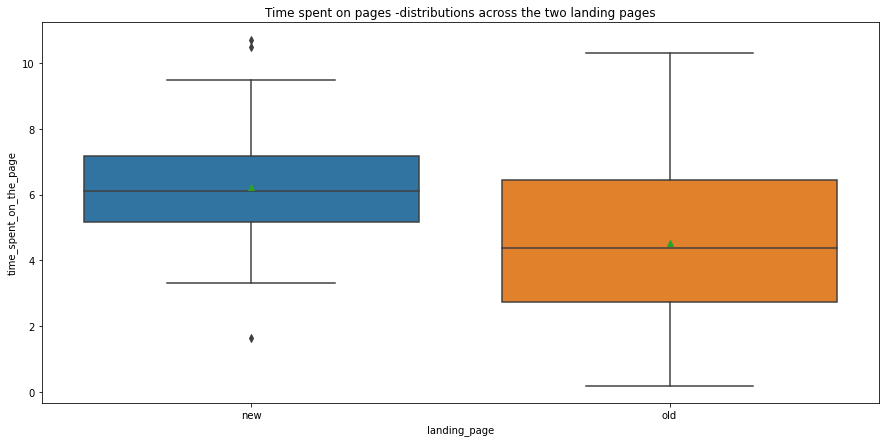

In [27]:
# the boxplot below shows that indeed the NEW landing page time spent mean is just over 6 minutes, while for the OLD...
# ...page the mean time spent on page is just over 4.5 minutes or so.

plt.figure(figsize=(15,7))
sns.boxplot(df['landing_page'],df['time_spent_on_the_page'], orient="v",showmeans=True)
plt.title('Time spent on pages -distributions across the two landing pages')
plt.show()

#### Observations:

* It looks like users spend overall (cumulatively speaking) more time on the new version of the landing page vs. the old version. This could potentially mean several things:
** A) The new page might have more content, and so it takes longer to read it.
** B) Or the new page is written in a less clear manner/format, hence it takes longer time to read it in order to understand it.
* Looking at mean times, the NEW page mean time is larger (6.22) vs. the mean time for the OLD page (4.53).

* New landing page seems to have IQR positioned between 5 and 7 minutes.
* Old landing page has its IQR positioned between 3 and 6.5 minutes.
* New landing page has smaller spectrum of times spent on the page (min/max range values) with some outliers on both ends.
* Older page has a wider spectrum/range of min/max values.

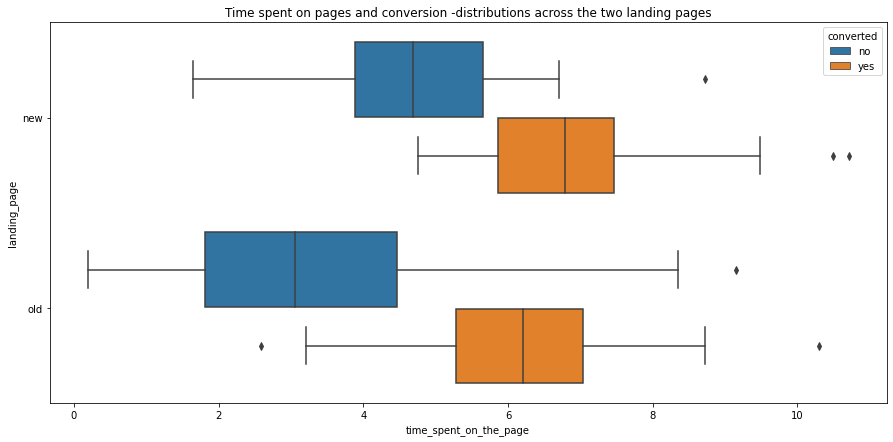

In [28]:
# using boxplots to visually investigate how 'no' and 'yes' conversions look from the mean time spent on page...
# and distribution perspectives in terms of both of the landing pages.

plt.figure(figsize=(15,7))
sns.boxplot(df['time_spent_on_the_page'],df['landing_page'], hue=df['converted'])
plt.title('Time spent on pages and conversion -distributions across the two landing pages')
plt.show()

#### Observations:

* The boxplot chart is intitively demonstrating that the NON-conversions have lower means and lower times spent on pages for both page designs. However, the OLD page design shows lower times spent on page for both conversion events, the 'yes' and 'no' conversion events.
* Now we see that both new and old landing pages have similar IQRs for the converted times spent on page. However, New page seems to have slightly elevated IQRs from 6-7.5 minutes, while the old landing page has IQR from 5.5-7 minutes. The old page, therefore, seems to take visitors less time to read in order to decided that they will convert.
* The non-converted times spent on pages shows that visitors take less reading time on the old page to decide that they will NOT convert (IQR from 2-4.5 minutes). While visitors to the new landing page spend longer time on page before they decide to NOT convert (IQR from 4-5.5 min). 

### Now let's look at this problem from the statistical perspective

#### Two Independent Sample Z-test for Equality of Means

#### Let's write the null and alternative hypothesis

* Let $\mu_1, \mu_2$ be the mean time spent on the NEW and OLD pages respectively.

* We want to test whether there is an increase in the time spent on the NEW page compared to the OLD page.

* We will test the null hypothesis

* >$H_0:\mu_1=\mu_2$

* against the alternate hypothesis

* >$H_a:\mu_1>\mu_2$

#### Let's test whether the Z-test assumptions are satisfied or not
* **Continuous data** - Yes, the time spent on page is measured on a continuous scale.
* **Normally distributed populations** - Yes, the visual data representation shows that the populations are normal.
* **Independent observations** - As we are taking the sampled unit randomly, the observed time measurements are independent.
* **Known population standard deviation 𝜎1 and 𝜎2**  - Yes, we know the population standard deviations of both the populations.
* **Random sampling from the population** - Yes, we are informed that the collected sample is a simple random sample.

In [29]:
# here observing the two samples
X1=df1[df1.landing_page=='new']['time_spent_on_the_page']
X2=df1[df1.landing_page=='old']['time_spent_on_the_page']

# here observing the standard deviations of both samples 
pop_sd1=df1[df1.landing_page=='new']['time_spent_on_the_page'].std()
pop_sd2=df1[df1.landing_page=='old']['time_spent_on_the_page'].std()

# here observin;g the count of both groups
n1=df1[df1.landing_page=='new']['time_spent_on_the_page'].count()
n2=df1[df1.landing_page=='old']['time_spent_on_the_page'].count()

In [30]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    """ 
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    """
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function

    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    pvl = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    return pvl # return the p-value

In [31]:
# find the p-value using the ztest_2samp() function

from numpy import sqrt, abs # import the required functions
from scipy.stats import norm 
from scipy import stats
time_p_value = ztest_2samp(X1,X2,pop_sd1,pop_sd2,n1,n2)
print('The P-value is', time_p_value)

The P-value is 7.630904034416908e-05


In [32]:
if time_p_value<.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


#### Observation:

* Since the p_value is much smaller than our significance level of .05, we are rejecting the null hypothesis. The amount of time spent on the NEW page by users is statistically significant (higher) compared to the amount of time spent on the OLD page.
* To repeat the above (prior) observation, this could potentially mean several things:
** A) The new page might have more content, and so it takes longer to read it.
** B) Or the new page is written in a less clear manner/format, hence it takes longer time to read it in order to understand it.
* We would still need to further test and understand how time spent on page benefits conversion rates, if at all.

## Objective 3: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

*Per project FAQs, the conversion rate is the proportion of users who visit the landing page and get converted. For example, if out of 50 users 20 gets converted, then the conversion rate is 20/50 =0.4*

In [33]:
# let's first calculate how many visitors reached or visited the OLD and NEW landing pages.
visits_old=df1[df1.landing_page=='old']['landing_page'].count()
visits_new=df1[df1.landing_page=='new']['landing_page'].count()

In [34]:
# then let's observe how many visitors converted on the OLD page...
converted_old=df1[df1.landing_page=='old'][df1.converted=='yes'].count()['converted']
# and how many visitors converted on the NEW page.
converted_new=df1[df1.landing_page=='new'][df1.converted=='yes'].count()['converted']

In [35]:
# and finally, let's calculate and print the conversion rates.
rate_old, rate_new = converted_old/visits_old, converted_new/visits_new

print('The old page conversion rate is', rate_old, 'and the new page conversion rate is', rate_new)

The old page conversion rate is 0.42 and the new page conversion rate is 0.66


#### Observation:

* The NEW page conversion rate is by around .24 points higher than the conversion rate for the OLD page.

####  *Another way to get to this same calculation...*
#### ==================================================================================

In [36]:
# copying data just in case
df2 = df1.copy()
df2.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [37]:
# create new column that will hold converted counts ('con_count' or conversion count)
df2['con_count']=0
df2.head() # use dataframe head function to ensure that the column was added

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,con_count
0,546592,control,old,3.48,no,Spanish,0
1,546468,treatment,new,7.13,yes,English,0
2,546462,treatment,new,4.40,no,Spanish,0
3,546567,control,old,3.02,no,French,0
4,546459,treatment,new,4.75,yes,Spanish,0


In [38]:
# each 'yes' in the 'converted' column will become a number '1' in the con_count column

for i in df2.index:
    if 'yes' in df2.loc[i,'converted']: # is the word 'yes' is in the column 'converted'?
        df2.loc[i,'con_count'] = 1 # if so, change the value within the 'con_count' (conversion count column) to 1
df2.head() # check the dataframe head to verify that the change occured

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,con_count
0,546592,control,old,3.48,no,Spanish,0
1,546468,treatment,new,7.13,yes,English,1
2,546462,treatment,new,4.40,no,Spanish,0
3,546567,control,old,3.02,no,French,0
4,546459,treatment,new,4.75,yes,Spanish,1


In [39]:
# group the dataframe by landing page, and find the mean of conversions for both, NEW and OLD pages.

df2.groupby('landing_page')[['con_count','time_spent_on_the_page']].mean() # by mean

,con_count,time_spent_on_the_page
landing_page,,
new,0.66,6.2232
old,0.42,4.5324


#### ====================================================================================

#### Observation:

* The probability of the NEW page converting is 0.66, and is by around 0.24 points higher than the conversion rate for the OLD page, which is at 0.42.
* The mean times spent on the NEW page by visitors is also higher than the mean time spent on the OLD page in similar proportions to the conversion means.

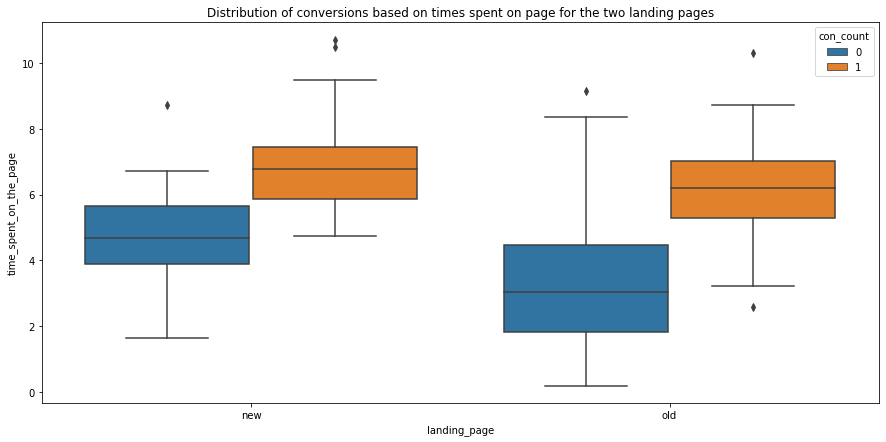

In [40]:
# using boxplots to visually observe the NO-conversions and their mean times spent on both landing pages.
plt.figure(figsize=(15,7))
sns.boxplot(df2['landing_page'],df2['time_spent_on_the_page'], hue=df2["con_count"])
plt.title('Distribution of conversions based on times spent on page for the two landing pages')
plt.show()

#### Chart observation:

* Looking at the charts, intuitively speaking, the distribution of 'yes' conversions (represented as '1' or orange color) look to be similar for the OLD page and the NEW page, especially with respect to IQRs. Means for both landing pages and their 'yes' conversions seem to be in the similar range from 6.5 to 7 min spent on page.
* Looking at the charts, similarly, we see that the there are bigger differences between the 'no' conversion time spent on page means (represented as '0' or blue color). Their means range from 3.5 min for OLD landing page to 4.5 min for the NEW landing page.

### *Now the statistical calculation*

### Two Proportion Z-test

### Let's write the null and alternative hypothesis

Let $p_1,p_2$ be the proportions of conversions between the two page variations, NEW and OLD respectively.

The marketer will test the null hypothesis that both pages have equal conversions

>$H_0:p_1 =p_2$

against the alternate hypothesis that the NEW page has greater conversion than the OLD page

>$H_a:p_1>p_2$

### Let's test whether the Z-test assumptions are satisfied or not

* **Binomally distributed population** - Yes, a visitor will either convert or not-convert. There is nothing in between.
* **Random sampling from the population** - Yes, we are informed that the collected sample is a simple random sample.
* **Can the binomial distribution approximated to normal distribution** - Yes. For binary data, CLT works slower than usual.

In [41]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted times OLD page at 21 times and NEW page at 33 times
conversion_count = np.array([21, 33])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, conv_p_value = proportions_ztest(conversion_count, nobs)
# above, doesn't pass the value or alternative. It assumes that the H0 is equal.

print('The p-value is ' + str(conv_p_value))

The p-value is 0.016052616408112556


In [42]:
# I also wanted to use the 'proportion_confint' function within stats to find out the confidence interval for...
# ...these two binomial proportions (NEW and OLD page conversions)

# import the required function
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = df2[df2['landing_page']=='old']['con_count']
treatment_results = df2[df2['landing_page']=='new']['con_count']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, conv1_pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {conv1_pval:.3f}')
print(f'At 95% confidence interval for the OLD page: lower bound = {lower_con:.3f}, and upper = {upper_con:.3f}')
print(f'At 95% confidence interval for the NEW page: lower bound = {lower_treat:.3f}, and upper = {upper_treat:.3f}')

z statistic: -2.41
p-value: 0.016
At 95% confidence interval for the OLD page: lower bound = 0.283, and upper = 0.557
At 95% confidence interval for the NEW page: lower bound = 0.529, and upper = 0.791


In [43]:
if conv1_pval<.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis


#### Observation:

* Since our p-value is smaller than our confidence interval of 0.05, we can assume statistical significance of our data and reject the H0. That also means that we can accept the alternate hypothesis that the conversion rate of the NEW page is likely significantly greater than the conversion rate of the OLD page.

## Objective 4: Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

#### Let's write the null and alternative hypothesis

* We want to test whether there is a dependency between the conversion status and the language preferences.

* We will test the null hypothesis

* >$H_0:$ converted status does NOT depend on preferred language

* against the alternate hypothesis

* >$H_a:$ converted status DOES depend on the language preferences

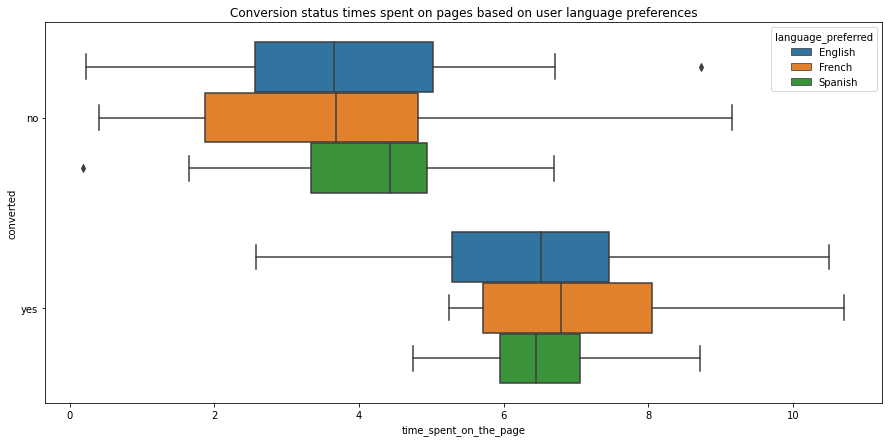

In [44]:
# looking at conversion times spent on pages based on the users' language preferences
plt.figure(figsize=(15,7))          
sns.boxplot(df['time_spent_on_the_page'],df['converted'],hue=df['language_preferred'])
plt.title('Conversion status times spent on pages based on user language preferences')
plt.show()

#### Chart observations:

* This chart shows a pretty clear distinction in terms of time spent on pages for all 3 languages. Mainly, it shows that the 5th minute of reading clearly separates the 'yes' from 'non' conversions in that all 3 languages have IQR 25th percentiles at or above the 5th minute of spending time on the page for covnerted visitors.
* Similarly, all 3 languages have IQR 75th percentile at or below the 5th minute of spending time on pages for the non-converted visitors.
* Spanish language preferences have the shortest IQR within both, non-conversion and conversions. They likely spend the least amount of time to decide whether they will convert as well as not convert (between all 3 language groups).
* Overall, all 3 languages show similar patterns with respect to time spent on page for 'yes' conversions, and the 3 languages show similar patterns with respect to time spent on page for the 'no' conversions. Their means are similar too and do not show big diversions, with exception of the Spanish language in the 'no' conversions, which has a big higher mean for times spent on page vs. other langauges in the same category.

In [45]:
#import the required functions
from scipy.stats import chi2_contingency

#preparing the needed data table using 'crosstab function'

"""crosstab() function in Python. This method is used to compute a simple cross-tabulation of 
two (or more) factors. By default, computes a frequency table of the factors unless an array of 
values and an aggregation function are passed."""

table= pd.crosstab(df1['language_preferred'],df1['converted'])
table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [46]:
chi, convert_p_value, dof, expected = chi2_contingency(table)

print('The p-value is ', convert_p_value)

The p-value is  0.2129888748754345


In [47]:
if convert_p_value<.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Accept the null hypothesis


#### Observation:

* As the p-value is much larger than 0.05, we don't have enough evidence to reject the H0. Hence, we can NOT say that the converted status depends on the preferred language.

## Objective 5: Is the mean time spent on the new page same for the different language users?

### Let's use F_Oneway

#### Let's write the null and alternative hypothesis

* We want to test whether the mean time spent on the new page is same or different for the 3 language preferences.

* We will test the null hypothesis

* >$H_0:$ mean times spent on the new page are the same for different languages.

* against the alternate hypothesis

* >$H_a:$ mean times spent on the new page are different for different languages.

### Let's test whether the assumptions are satisfied or not

* **The populations are normally distributed** - Yes, the normality assumption is verified using the Shapiro-Wilk’s test below.
* **Samples are independent simple random samples** - Yes, we are informed that the collected sample is a simple random sample.
* **Population variances are equal** - Yes, the homogeneity of variance assumption is verified using the Levene's test below.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time spent on NEW page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on NEW page does NOT follow a normal distribution

In [48]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value for the time spent on NEW landing page
w, p_value = stats.shapiro(df1[df1.landing_page=='new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is much larger than the 0.05 significance level, we fail to reject the null hypothesis that the time spent on NEW page follows a normal distribution. In other words, the time spent on NEW page DOES follow the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [49]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test
from scipy.stats import levene

# find the p-value for the time spent on NEW landing page and all 3 languages
statistic, p_value = levene(df1[df1.landing_page=='new'][df1['language_preferred']=='English']['time_spent_on_the_page'],
                            df1[df1.landing_page=='new'][df1['language_preferred']=='Spanish']['time_spent_on_the_page'],
                            df1[df1.landing_page=='new'][df1['language_preferred']=='French']['time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the the 0.05 significance level, we fail to reject the null hypothesis of homogeneity of variances. In other words, the variances for the 3 language preferences across the times spent on pages are fairly homogeneous.

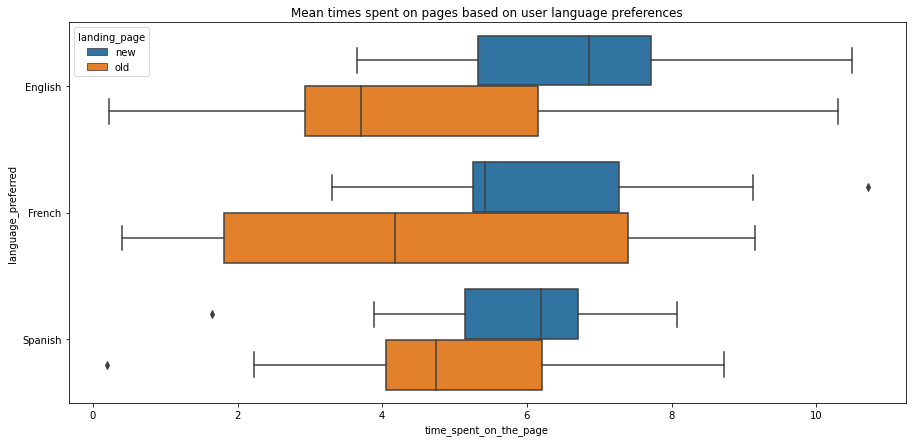

In [50]:
plt.figure(figsize=(15,7))          
sns.boxplot(df['time_spent_on_the_page'],df['language_preferred'],hue=df['landing_page'])
plt.title('Mean times spent on pages based on user language preferences')
plt.show()

#### Chart observations (observing just for the new page)

* The 3 languages, when observed on the NEW page, show similar times spent on page with IQRs starting at around 5 min spent on page (25th percentile), and IQRs ending (75th percentile) between 7-8 min.
* The means of the 3 languges are also ranging between 5 min (French), close to 6 min for Spanish, and nearly 7 min for English.
* The mean for the French language is very close to its IQRs 25th percentile, which could show a right skewed distribution for the French language.

In [51]:
# import the required function
from scipy.stats import f_oneway

# preparing the data for the NEW page
english=df1[df1.landing_page=='new'][df1.language_preferred=='English']['time_spent_on_the_page']
spanish=df1[df1.landing_page=='new'][df1.language_preferred=='Spanish']['time_spent_on_the_page']
french=df1[df1.landing_page=='new'][df1.language_preferred=='French']['time_spent_on_the_page']

In [52]:
# find the p-value using f_oneway
test_stat, lang_p_value = f_oneway(english,spanish,french)

print('The p-value for the NEW page is ', lang_p_value)

The p-value for the NEW page is  0.43204138694325955


In [53]:
if lang_p_value<.05:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Accept the null hypothesis


#### Observations: 

* As the p-value for the NEW page is greater than 0.05, we do NOT have enough evidence to reject the null hypothesis and therefore we can NOT say that there are statistically significant differences in the mean times spent on the NEW page for different language users. Put yet in another way, the mean times spent on the new page is independent of the language preferences. This conclusion, however, slightly differs from what the chart is showing intuitively.

## Conclusion and Recommendations

#### Conclusion Intro:

We analyzed an A/B test dataset of around 100 website unique visitors/subscribers for an online news portal - E-news Express. Since E-News Express key objective is to expand their business by acquiring new subscribers, we used the A/B test and its analysis to understand how their new landing page is converting, and what are the impacts of their readers' language preferences on the conversion rates. The old landing page was served to the first group (control group) and the new landing page was served to the second group (treatment group). With that in mind, we used EDA (exploratory data analysis), and statistical analysis to better understand the impact of conversion rates and language preferences. Below is my conclusion and key insights based on data.

### Current Recommendations

##### Time spent on page

* The OLD page version has a wider spectrum/range of min/max values for the times spent on page.
* The NEW landing page converts starting at 4.5 min spent on page, while the old landing page converts starting as low as 3 min spent on page.
* It appears that the OLD landing page requires slightly less time spent on page in order to convert for a certain distribution of the conversions. However, we could also say that the OLD landing page requires considerably less time spent on page in order for the certain number of visitors to drop off (not convert).
* The OLD page seems to take visitors less time to read in order to decided that they will convert.
* The non-converted times spent on pages shows that visitors take less reading time on the old page to decide that they will NOT convert (IQR from 2-4.5 minutes). While visitors to the new landing page spend longer time on page before they decide to NOT convert (IQR from 4-5.5 min).

* The count of most conversions, in terms of the time spent on pages, happens at the 6th minute of time spent on page and above. Simultaneously, the chart shows that most non-conversions happen from 0 - 4 minutes of time spent on pages in terms of the count of occurences.

* Statistically speaking, the amount of time spent on the NEW page by users is statistically significant (higher) compared to the amount of time spent on the OLD page. This could potentially mean several things:
* * A) The new page might have more content, and so it takes longer to read it before users realize whether they will convert or not.
* * B) Or the new page is written in a less clear manner/format, hence it takes longer time to read it in order to understand it and before the decision is made to either drop off or convert.

> ##### Future considerations for the time spent on page

> * We would need to further test and understand how and why times spent on page benefit conversion rates, if at all, for both NEW and OLD pages. 
> * The company should invest in the common UX (user experience) practices, and develop user personas and user journeys to understand how the sources of traffic and other pertinent user data (e.g. demographics, psychographics, etc.) influence users' decisions to either drop off or convert.


##### Language preferences

* The 5th minute of reading clearly separates the 'yes' from 'no' conversions on all 3 languages - English, Spanish, and French. All 3 languages have IQR 25th percentiles at or above the 5th minute of spending time on the page for covnerted visitors. Similarly, all 3 languages have IQR 75th percentile at or below the 5th minute of spending time on pages for the non-converted visitors. So, it appears that the 5th minute of reading is a magical moment for the company, and the company might need to invest to understand that separation of times spent on page in relation to the language preferences.
* Spanish language preferences have the shortest IQR within both, non-conversion and conversions. Spanish readers likely spend the least amount of time in both cases, to decide whether they will convert as well as to decide not to convert.
* The lack of statistical significance in this area of language preferences and time spent on page tells us that we cannot claim with certainty that the converted status depends on the preferred languages. We do NOT have enough evidence to say whether there are any difference in the mean times spent on the NEW page for different language users. Put yet in another way, the time spent on the new page is independent of the language preference.
* Even if there were for a statistical significance, we wouldn't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests would be used to test the differences between all pairs of means.

> ##### Future considerations for the language preferences and time spent on page

> * The company should invest a bit more time in A/B testing various page elements in relation to the language preference. 
> * They could also hire writers that are native speakers in the targeted languages, to ensure the creation of original content that is specifically intended for those end-users and their language preferences.


##### Overall conversions

* The probability of the NEW page converting is 0.66, and is by around 0.24 points higher than the conversion rate for the OLD page, which is at 0.42. The mean times spent on the NEW page by visitors is also higher than the mean time spent on the OLD page in similar proportions to the conversion means.
* The conversion rate of the NEW page is significantly greater than the conversion rate of the OLD page.

> ##### Future considerations for the language preferences and time spent on page

> * The company should further elaborate and investigate using A/B and multivariate tests to better understand the impact of language preferences, but also the impact of other user attributes and their demographic, geographic, and psychographic data and context on the overall conversion rates.
> * The company should also investigate other types of online data resulting from the tests (other online data and variables), such as other pages visited before/after the landing page (pages per session), overall session length and session by source, bounce rate, common user paths / user flows, users' browser information, screen size and device information, on-page viewing, and many other bits of contextual information in order to understand where and how to improve the conversion rates.

### End of paper